<a href="https://colab.research.google.com/github/elangbijak4/kode-dinda-terbaru/blob/main/progres4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv('/content/data_aids.csv', sep=';')

In [26]:
data

,cd40,cd420,infected
0,422,477,0
1,162,218,1
2,326,274,0
3,287,394,0
4,504,353,0
...,...,...,...
2134,152,109,0
2135,373,218,0
2136,419,364,0
2137,166,169,1


In [33]:
# Select a random subset of rows from the dataframe
n = 20 # number of samples to take
data = data.sample(n=n)

# Save the sampled data to a new CSV file
data.to_csv("dataset.csv", index=False)

In [28]:
data

,cd40,cd420,infected
2082,359,253,1
335,259,423,0
999,216,346,1
189,452,589,0
1266,309,318,0
...,...,...,...
837,188,207,1
1800,530,720,0
60,204,494,0
1839,319,410,0


In [21]:
def preprocess_data(file_path):
    # Mengimpor data dari CSV
    data = pd.read_csv(file_path)

    # Menghapus kolom yang bukan bilangan (numerik)
    numeric_data = data.select_dtypes(include=[np.number])

    # Mengonversi DataFrame ke numpy array untuk memudahkan perhitungan
    return numeric_data.values

def find_nearest(record, dataset, selected_records):
    # Fungsi ini untuk mencari rekord terdekat dengan rekord yang diberikan
    min_dist = float('inf')
    nearest_record = None
    for r in dataset:
        if np.array_equal(r, record) or any(np.array_equal(r, sr) for sr in selected_records):
            continue
        dist = np.linalg.norm(np.array(record) - np.array(r))  # Menghitung jarak Euclidean
        if dist < min_dist:
            min_dist = dist
            nearest_record = r
    return nearest_record, min_dist

def plot_points(dataset, selected_records, nearest_records):
    plt.figure(figsize=(10, 8))

    # Plot semua titik dalam dataset
    plt.scatter(dataset[:, 0], dataset[:, 1], c='blue', label='Dataset', alpha=0.5)

    # Plot titik-titik yang dipilih
    selected_records = np.array(selected_records)
    plt.scatter(selected_records[:, 0], selected_records[:, 1], c='green', label='Selected Records', marker='x')

    # Plot titik-titik terdekat
    nearest_records = np.array([nr for nr in nearest_records if nr is not None])
    if nearest_records.size > 0:
        plt.scatter(nearest_records[:, 0], nearest_records[:, 1], c='red', label='Nearest Records', marker='o')

    # Menambahkan anotasi koordinat untuk setiap titik dalam dataset
    for i, point in enumerate(dataset):
        plt.annotate(f"({point[0]:.2f}, {point[1]:.2f})", (point[0], point[1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='blue')

    # Menambahkan anotasi koordinat untuk titik-titik yang dipilih
    for i, point in enumerate(selected_records):
        plt.annotate(f"({point[0]:.2f}, {point[1]:.2f})", (point[0], point[1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='green')

    # Menambahkan anotasi koordinat untuk titik-titik terdekat
    for i, point in enumerate(nearest_records):
        plt.annotate(f"({point[0]:.2f}, {point[1]:.2f})", (point[0], point[1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Selected Records and Their Nearest Records')
    plt.legend()
    plt.show()

In [53]:
def process_records(data, k, arrayK, arrayB):
    selected_records = []
    while len(selected_records) < k:
        record = random.choice(data)
        if record.tolist() not in [rec.tolist() for rec in selected_records]:
            selected_records.append(record)
    print("Rekord yang terpilih:")
    for idx, record in enumerate(selected_records, 1):
        print(f"Rekord {idx}: {record}")

    nearest_candidates = []
    for i in range(1, k + 1):
        record = selected_records[i - 1]
        nearest_record, min_dist = find_nearest(record, data, selected_records)
        nearest_candidates.append((record.tolist(), nearest_record.tolist() if nearest_record is not None else None, min_dist))

    nearest_candidates.sort(key=lambda x: x[2])
    used_nearest_records = []
    for record, nearest_record, dist in nearest_candidates:
        if nearest_record is not None and nearest_record not in used_nearest_records:
            index = next(i for i, rec in enumerate(selected_records) if rec.tolist() == record)
            arrayB[index] = np.array(nearest_record)
            used_nearest_records.append(nearest_record)

    for i in range(k):
        arrayK[i][0] = arrayB[i]

    print("ArrayK:")
    for idx, record in enumerate(arrayK, 1):
        print(f"ArrayK {idx}: {record}")

    print("ArrayB:", arrayB)
    return selected_records, arrayB, arrayK


In [48]:
# Langkah 0: Import dataset.csv menjadi data dan praproses data
data = preprocess_data('/content/dataset.csv')

In [49]:
# Langkah 1: MULAI
# Langkah 2: Input nilai k
k = int(input("Masukkan nilai k: "))

Masukkan nilai k: 5


Rekord yang terpilih:
Rekord 1: [480 403   0]
Rekord 2: [207 356   0]
Rekord 3: [233 240   0]
Rekord 4: [267 226   1]
Rekord 5: [415 397   0]
ArrayK:
ArrayK 1: [array([562, 444,   1])]
ArrayK 2: [None]
ArrayK 3: [array([202, 274,   0])]
ArrayK 4: [array([290, 262,   1])]
ArrayK 5: [array([358, 326,   1])]
ArrayB: [array([562, 444,   1]), None, array([202, 274,   0]), array([290, 262,   1]), array([358, 326,   1])]


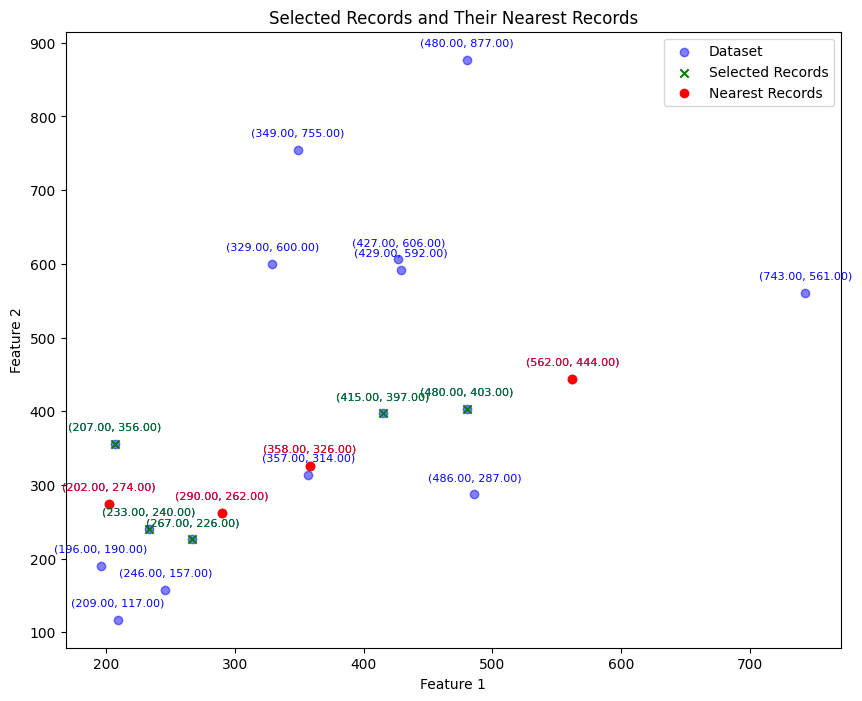

In [55]:
arrayK = [[None] for _ in range(k)]
arrayB = [None] * k
selected_records, arrayB, arrayK = process_records(data, k,arrayK,arrayB)
plot_points(data, selected_records, arrayB)